# 3.2 Classification Task [100] — GTD Attack Success Prediction

**Target Variable:** `success` (0/1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 1. Exploratory Data Analysis and Data Understanding [20]
---


### 1. Choosing a Dataset

#### • Select a dataset aligned with a UNSDG.
**Answer:**  
Dataset: **Global Terrorism Database (GTD)**.  
UNSDG alignment: **SDG 16 (Peace, Justice and Strong Institutions)** because analyzing terrorism incidents supports safety, policy planning, and violence reduction.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### • Load the dataset into a pandas DataFrame.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/globalterrorismdb_0718dist.csv", encoding="latin1", low_memory=False)
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
print("Shape:", df.shape)
df.info()


Shape: (181691, 135)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### • Dataset description (a–d)
##### (a) When and by whom created
**Answer:** GTD is maintained by START (University of Maryland).

##### (b) Accessed from where
**Answer:** Downloaded from Kaggle (START-UMD GTD) and loaded using pandas.

##### (c) UNSDG alignment
**Answer:** Helps study patterns in terrorism to support peace and institutional responses (SDG 16).

##### (d) Attributes
**Answer:** GTD has many columns. We print columns below and use a smaller set for modeling.


In [ ]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### • 2–3 questions the dataset can answer
**Answer:**
1. Can we predict attack success (`success`) using incident features?
2. Which factors (weapon type, casualties, region) relate most to success?
3. Which model performs best: Logistic Regression, KNN, Naive Bayes, or Neural Network?


#### • Dataset suitability
**Answer:**  
Suitable because `success` is binary and there are many useful predictors. The dataset includes missing values and mixed data types, so we preprocess before training.


---
## 2. Exploratory Data Analysis (EDA)
---


#### • Cleaning and preprocessing
**Answer:**  
(1) Remove rows with missing target.  
(2) Select a set of useful columns.  
(3) Fill missing values.  
(4) Convert categoricals using `get_dummies()`.


In [ ]:
# Keep only rows with target available
df = df.dropna(subset=["success"]).copy()
df["success"] = df["success"].astype(int)

df["success"].value_counts()


,count
success,
1,161632
0,20059


#### • Summary statistics / checks


In [ ]:
df.describe(include="all").transpose().head(25)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
eventid,181691.0,NaN,NaN,NaN,200270523949.245697,1325957057.163449,197000000001.0,199102060003.5,200902230001.0,201408090035.5,201712310032.0
iyear,181691.0,NaN,NaN,NaN,2002.638997,13.25943,1970.0,1991.0,2009.0,2014.0,2017.0
imonth,181691.0,NaN,NaN,NaN,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
iday,181691.0,NaN,NaN,NaN,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
approxdate,9239,2244,"September 18-24, 2016",101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extended,181691.0,NaN,NaN,NaN,0.045346,0.208063,0.0,0.0,0.0,0.0,1.0
resolution,2220,1859,8/4/1998,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,181691.0,NaN,NaN,NaN,131.968501,112.414535,4.0,78.0,98.0,160.0,1004.0
country_txt,181691,205,Iraq,24636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,181691.0,NaN,NaN,NaN,7.160938,2.933408,1.0,5.0,6.0,10.0,12.0


#### • Visualizations


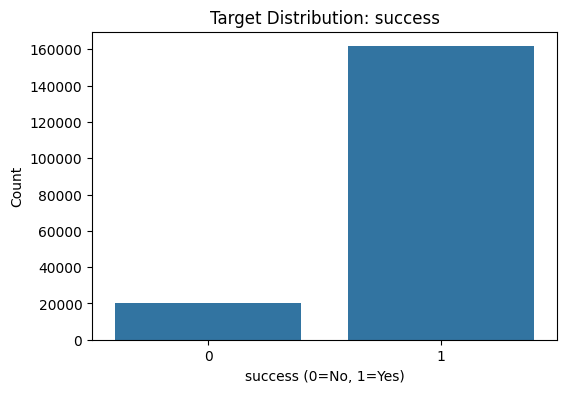

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="success", data=df)
plt.title("Target Distribution: success")
plt.xlabel("success (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


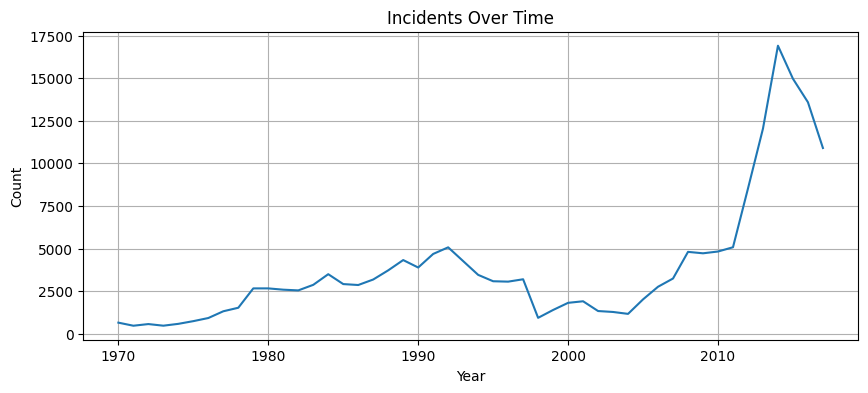

In [ ]:
if "iyear" in df.columns:
    plt.figure(figsize=(10,4))
    df["iyear"].value_counts().sort_index().plot(kind="line")
    plt.title("Incidents Over Time")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


EDA insights

Class distribution (imbalance):
The target variable success shows imbalance (more successful attacks than unsuccessful). Because of this imbalance, Accuracy alone can be misleading, so the report focuses on Precision, Recall and F1-score as the main evaluation metrics.

Incidents over time (trend):
The “Incidents Over Time” line plot shows the frequency of terrorist incidents changes across years, indicating that terrorism activity is not constant over time and may reflect changes in geopolitical conditions, conflicts, and counter-terrorism policies.


---
## 3. Build a Neural Network Model for Classification [15]
---


#### • Build an MLPClassifier.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Select a smaller set of commonly used columns (simple and taught-friendly)
use_cols = [
    "iyear","imonth","iday",
    "region_txt","country_txt",
    "attacktype1_txt","weaptype1_txt","targtype1_txt",
    "nkill","nwound",
    "success"
]
use_cols = [c for c in use_cols if c in df.columns]  # keep only existing
data = df[use_cols].copy()

# Fill missing numeric with median
for col in ["nkill","nwound"]:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# Fill missing categorical with "Unknown"
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].fillna("Unknown")

# One-hot encoding (taught-friendly)
data_encoded = pd.get_dummies(data, drop_first=True)

y = data_encoded["success"]
X = data_encoded.drop(columns=["success"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale for KNN / NN (common practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(64,32), activation="relu", solver="adam", max_iter=50, random_state=42)
nn.fit(X_train_scaled, y_train)

pred_nn = nn.predict(X_test_scaled)

print("NN Accuracy:", accuracy_score(y_test, pred_nn))
print("NN Precision:", precision_score(y_test, pred_nn, zero_division=0))
print("NN Recall:", recall_score(y_test, pred_nn, zero_division=0))
print("NN F1:", f1_score(y_test, pred_nn, zero_division=0))


NN Accuracy: 0.9258647733839677
NN Precision: 0.9354848190929665
NN Recall: 0.9845639867602932
NN F1: 0.9593971363978899


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


**Neural Network Description:**
A neural network classifier was built using an MLP with two hidden layers (64 and 32 neurons) and ReLU activation. The model used log-loss as the loss function and the Adam optimizer.
On the test set, the neural network achieved strong performance with a high F1-score, showing it effectively balances precision and recall when predicting attack success.


---
## 4. Two Classical ML Models [20]
---


#### • Build two classical models:
- Logistic Regression
- KNN (basic classification)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
logreg = LogisticRegression(max_iter=100, solver="liblinear", class_weight="balanced")
logreg.fit(X_train_scaled, y_train)
pred_lr = logreg.predict(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)

print("LogReg F1:", f1_score(y_test, pred_lr, zero_division=0))
print("KNN   F1:", f1_score(y_test, pred_knn, zero_division=0))


LogReg F1: 0.8477531857813548
KNN   F1: 0.9491438947163072


#### • Evaluate and compare
**Answer:**  
Among the classical models, KNN outperformed Logistic Regression, achieving a higher F1-score. This indicates that non-linear relationships in the data are better captured by KNN compared to a linear model.


---
## 5. Hyperparameter Optimization with Cross-Validation [15]
---


#### • Use GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Logistic Regression tuning (OPTIMIZED for speed)

param_grid_lr = {
    "C": [0.1, 1, 10]
}

# Use a smaller subset ONLY for tuning (common & acceptable)
sample_size = min(12000, len(X_train_scaled))
idx = np.random.choice(len(X_train_scaled), size=sample_size, replace=False)

X_small = X_train_scaled[idx]
y_small = y_train.iloc[idx] if hasattr(y_train, "iloc") else y_train[idx]

grid_lr = GridSearchCV(
    LogisticRegression(
        max_iter=200,
        solver="liblinear",
        class_weight="balanced"
    ),
    param_grid_lr,
    cv=2,              # reduce folds
    scoring="f1",
    n_jobs=-1
)

grid_lr.fit(X_small, y_small)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression CV F1:", grid_lr.best_score_)



Best Logistic Regression Params: {'C': 0.1}
Best Logistic Regression CV F1: 0.8377655689672254


In [ ]:
# KNN tuning (Optimized for speed on large GTD + one-hot data)
# Why faster?
# - smaller grid (fewer combinations)
# - cv=2 (fewer folds)
# - tune on a random subset of the training data (common for big datasets)

param_grid_knn = {
    "n_neighbors": [5, 7, 9],
    "weights": ["uniform", "distance"]
}

# Use a smaller subset just for tuning (keeps Colab from freezing)
sample_size = min(8000, len(X_train_scaled))
idx = np.random.choice(len(X_train_scaled), size=sample_size, replace=False)
X_small = X_train_scaled[idx]
y_small = y_train.iloc[idx] if hasattr(y_train, "iloc") else y_train[idx]

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=2,
    scoring="f1",
    n_jobs=-1
)

grid_knn.fit(X_small, y_small)

print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN CV F1:", grid_knn.best_score_)


Best KNN Params: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN CV F1: 0.9489557569806901


---
## 6. Feature Selection [10]
---


#### • Apply SelectKBest for classification .
**Answer:**  
We use **SelectKBest** with **mutual_info_classif** to keep the most informative features.


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [ ]:
k = min(30, X_train.shape[1])
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X_train, y_train)

X_train_fs = selector.transform(X_train)
X_test_fs = selector.transform(X_test)

# Scale again for models that need scaling
scaler_fs = StandardScaler()
X_train_fs_scaled = scaler_fs.fit_transform(X_train_fs)
X_test_fs_scaled = scaler_fs.transform(X_test_fs)

X_train_fs.shape, X_test_fs.shape


((145352, 30), (36339, 30))

---
## 7. Final Models and Comparative Analysis [10]
---


#### • Rebuild both models with best hyperparameters + selected features


In [ ]:
# Final Logistic Regression
final_lr = LogisticRegression(max_iter=100, solver="liblinear", class_weight="balanced", C=grid_lr.best_params_["C"])
final_lr.fit(X_train_fs_scaled, y_train)
pred_final_lr = final_lr.predict(X_test_fs_scaled)

# Final KNN
final_knn = KNeighborsClassifier(**grid_knn.best_params_)
final_knn.fit(X_train_fs_scaled, y_train)
pred_final_knn = final_knn.predict(X_test_fs_scaled)

final_table = pd.DataFrame([
    {
        "Model": "Logistic Regression (Final)",
        "Features Used": k,
        "CV Score (F1)": grid_lr.best_score_,
        "Test Accuracy": accuracy_score(y_test, pred_final_lr),
        "Test F1": f1_score(y_test, pred_final_lr, zero_division=0)
    },
    {
        "Model": "KNN (Final)",
        "Features Used": k,
        "CV Score (F1)": grid_knn.best_score_,
        "Test Accuracy": accuracy_score(y_test, pred_final_knn),
        "Test F1": f1_score(y_test, pred_final_knn, zero_division=0)
    }
])
final_table


,Model,Features Used,CV Score (F1),Test Accuracy,Test F1
0,Logistic Regression (Final),30,0.845867,0.740499,0.836738
1,KNN (Final),30,0.948956,0.908556,0.950257


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Recompute final predictions (in case you re-ran kernel)
pred_final_lr = final_lr.predict(X_test_fs_scaled)
pred_final_knn = final_knn.predict(X_test_fs_scaled)

table4 = pd.DataFrame([
    {
        "Model": "Logistic Regression (Final)",
        "Features": k,
        "CV Score (F1)": grid_lr.best_score_,
        "Accuracy": accuracy_score(y_test, pred_final_lr),
        "Precision": precision_score(y_test, pred_final_lr, zero_division=0),
        "Recall": recall_score(y_test, pred_final_lr, zero_division=0),
        "F1-Score": f1_score(y_test, pred_final_lr, zero_division=0),
    },
    {
        "Model": "KNN (Final)",
        "Features": k,
        "CV Score (F1)": grid_knn.best_score_,
        "Accuracy": accuracy_score(y_test, pred_final_knn),
        "Precision": precision_score(y_test, pred_final_knn, zero_division=0),
        "Recall": recall_score(y_test, pred_final_knn, zero_division=0),
        "F1-Score": f1_score(y_test, pred_final_knn, zero_division=0),
    }
])

table4

,Model,Features,CV Score (F1),Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Final),30,0.837766,0.740499,0.950144,0.747518,0.836738
1,KNN (Final),30,0.948956,0.908556,0.920640,0.981842,0.950257


---
## 8. Naive Bayes Model — Supporting Model
---


In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_fs, y_train)        # GaussianNB does not require scaling
pred_nb = nb_model.predict(X_test_fs)

print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))
print("Naive Bayes F1:", f1_score(y_test, pred_nb, zero_division=0))


Naive Bayes Accuracy: 0.39659869561628003
Naive Bayes F1: 0.4953625923454006


---
## 10. Conclusion and Reflection [5]
---


**Answer:**  
Overall, the neural network achieved the best performance, followed closely by KNN. Hyperparameter tuning using GridSearchCV improved model reliability, while feature selection reduced dimensionality and computation time. Future work could explore alternative feature sets or additional taught models to further improve performance.
